In [1]:
from eventio import SimTelFile
import matplotlib.pyplot as plt
import copy
import numpy as np
import csv
from itertools import chain
from lstchain import mc
import numpy as np
import astropy.units as u
import glob
import math

### Scheme of 4LST configuration together with CSCAT region in Corsika simulation (blue circle)

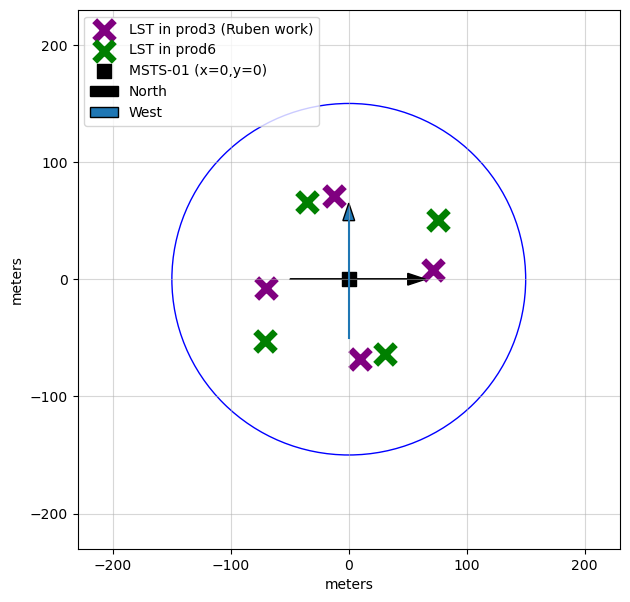

In [3]:
telescope1 = [-70.93, -52.07]
telescope2 = [-35.27, 66.14]
telescope3 = [75.28, 50.49]
telescope4 = [30.91, -64.54]

# telescope5 = [-70.05, -7.23]
# telescope6 = [-12.3, 71.29]
# telescope7 = [71.82, 8.2]
# telescope8 = [9.31, -68.07]

telescope_ruben = np.array([[-70.05, -7.23], [-12.3, 71.29], [71.82, 8.2],[9.31, -68.07]])

telescope_prod3b = np.array([[-70.04, -7.23], [-34.37, 110.98], [76.18, 95.34], [31.81, -19.70]])

telescope_prod6 = np.array([[-70.91, -52.35], [-35.28, 65.92], [75.31, 50.21], [30.88,-63.78]])

plt.figure(figsize=(7,7))

# plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5)
# plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5)
# plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5)
# plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5)

plt.scatter(telescope_ruben[:,0],telescope_ruben[:,1], label = 'LST in prod3 (Ruben work)', marker = 'x', s =200, lw = 5, c='purple')

plt.scatter(telescope_prod6[:,0],telescope_prod6[:,1], label = 'LST in prod6', marker = 'x', s =200, lw = 5, c='green')

#plt.scatter(telescope_prod3b[:,0],telescope_prod3b[:,1], label = 'LST_prod3b', marker = 'x', s =20, lw = 5, c='red')

circle2 = plt.Circle((0, 0), 150, color='b', fill=False)

plt.scatter(0,0, marker = 's', c = 'k', s = 100, label = 'MSTS-01 (x=0,y=0)')
plt.arrow(-50, 0, 100, 0,head_width=10, label = 'North', color = 'k')
plt.arrow(0, -50, 0, 100,head_width=10, label = 'West')
plt.plot([0,0,0],[-50,0,50])

plt.xlim(-230,230)
plt.ylim(-230,230)
plt.grid(alpha = 0.5)
plt.gca().add_patch(circle2)
plt.xlabel("meters")
plt.ylabel("meters")
plt.legend(loc='upper left')


#### Distance between LST telescopes in Ruben's simulation

In [51]:
print(f"distance between LST1 and LST2 = {math.dist(telescope_ruben[0], telescope_ruben[1])}")
print(f"distance between LST2 and LST3 = {math.dist(telescope_ruben[1], telescope_ruben[2])}")
print(f"distance between LST3 and LST4 = {math.dist(telescope_ruben[2], telescope_ruben[3])}")
print(f"distance between LST1 and LST4 = {math.dist(telescope_ruben[3], telescope_ruben[0])}")

distance between LST1 and LST2 = 97.47026674837821
distance between LST2 and LST3 = 105.14999999999999
distance between LST3 and LST4 = 98.6134524291691
distance between LST1 and LST4 = 99.9975759706204


#### Distance between LST telescopes in prod6

In [4]:
print(f"distance between LST1 and LST2 = {math.dist(telescope_prod6[0], telescope_prod6[1])}")
print(f"distance between LST2 and LST3 = {math.dist(telescope_prod6[1], telescope_prod6[2])}")
print(f"distance between LST3 and LST4 = {math.dist(telescope_prod6[2], telescope_prod6[3])}")
print(f"distance between LST1 and LST4 = {math.dist(telescope_prod6[3], telescope_prod6[0])}")
print(f"distance between LST1 and LST3 = {math.dist(telescope_prod6[0], telescope_prod6[2])}")

distance between LST1 and LST2 = 123.5204023633343
distance between LST2 and LST3 = 111.70027842400394
distance between LST3 and LST4 = 122.34273578762249
distance between LST1 and LST4 = 102.42972713035995
distance between LST1 and LST3 = 178.60246918785865


### Distance between LST telescopes in prod3b

In [86]:
print(f"distance between LST1 and LST2 = {math.dist(telescope_prod3b[0], telescope_prod3b[1])}")
print(f"distance between LST2 and LST3 = {math.dist(telescope_prod3b[1], telescope_prod3b[2])}")
print(f"distance between LST3 and LST4 = {math.dist(telescope_prod3b[2], telescope_prod3b[3])}")
print(f"distance between LST1 and LST4 = {math.dist(telescope_prod3b[3], telescope_prod3b[0])}")

distance between LST1 and LST2 = 123.47450344099386
distance between LST2 and LST3 = 111.650849078724
distance between LST3 and LST4 = 123.30003446877053
distance between LST1 and LST4 = 102.61054234336744


In [81]:
alpha = np.deg2rad(1.2)
distance = 77
def calculate_muon_height(alpha, distance):
    return distance / math.tan(alpha)

calculate_muon_height(alpha, 6)

286.43700843837325

In [72]:
1500*math.tan(np.deg2rad(1.2))

31.42052086448998

### Eventio processing of simtel files 

In [26]:
with eventio.SimTelFile('/Users/vdk/UnrealLST/simtel_investigations/MONOSTEREO_run1001_muon.simtel.gz') as fi:
    for i, event in enumerate(fi.iter_mc_events()):
        #print(event.keys())
        print(event['mc_shower']['n_profiles'])
        if i > 50: 
            break

AttributeError: 'EventIOFile' object has no attribute 'iter'

In [24]:
event['mc_event']

{'shower_num': 52,
 'xcore': 104.1319351196289,
 'ycore': 106.15702819824219,
 'aweight': 1.0,
 'event_id': 5200}

In [23]:
event.keys()


dict_keys(['event_id', 'mc_shower', 'mc_event', 'photons', 'emitter', 'photoelectrons'])

In [84]:
with eventio.SimTelFile('/Users/vdk/UnrealLST/simtel_investigations/ARRAYSTEREO_run1001_muon.simtel.gz') as fi:
    for event in fi:
        if len(event['telescope_events']) > 1:
            print(event['telescope_events'].keys())
            array_stereo_event = copy.deepcopy(event)

dict_keys([1, 4])
dict_keys([1, 4])
dict_keys([1, 4])


In [108]:
telescopes = []
with eventio.SimTelFile('/Users/vdk/UnrealLST/simtel_investigations/STEREOSTEREO_run1001_muon.simtel.gz') as fi:
    for event in fi:
        if len(event['telescope_events']) > 1:
            print(event['telescope_events'].keys())
            stereo_stereo_event = copy.deepcopy(event)
            telescopes.append(list(event['telescope_events'].keys()))

dict_keys([1, 4])
dict_keys([1, 4])
dict_keys([1, 4])


In [118]:
telescopes = []
with eventio.SimTelFile('/Users/vdk/UnrealLST/simtel_investigations/MONOSTEREO_run1001_muon.simtel.gz') as fi:
    for event in fi:
        if len(event['telescope_events']) > 0:
            #print(event['telescope_events'].keys())
            telescopes.append(list(event['telescope_events'].keys()))

In [76]:
# Keys to extract number of triggered telescopes
event['trigger_information']['n_triggered_telescopes']

1

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4341,) + inhomogeneous part.

In [90]:
# array stereo event containment
array_stereo_event

{'type': 'data',
 'event_id': 1316200,
 'mc_shower': {'shower': 13162,
  'primary_id': 2,
  'energy': 0.031513992697000504,
  'azimuth': 0.9312111735343933,
  'altitude': 1.5547243356704712,
  'depth_start': 580.0,
  'h_first_int': 1.0,
  'xmax': 610.0,
  'hmax': 4432.57568359375,
  'emax': -20.0,
  'cmax': 790.0005493164062,
  'n_profiles': 3,
  'profiles': [{'id': 1001,
    'n_steps': 42,
    'start': 0.0,
    'end': 840.0,
    'content': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)},
   {'id': 1002,
    'n_steps': 42,
    'start': 0.0,
    'end': 840.0,
    'content': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)},
   {'id': 1010,
    'n_steps': 42,
    

In [89]:
# stereo stereo event containment
stereo_stereo_event

{'type': 'data',
 'event_id': 1316200,
 'mc_shower': {'shower': 13162,
  'primary_id': 2,
  'energy': 0.031513992697000504,
  'azimuth': 0.9312111735343933,
  'altitude': 1.5547243356704712,
  'depth_start': 580.0,
  'h_first_int': 1.0,
  'xmax': 610.0,
  'hmax': 4432.57568359375,
  'emax': -20.0,
  'cmax': 790.0005493164062,
  'n_profiles': 3,
  'profiles': [{'id': 1001,
    'n_steps': 42,
    'start': 0.0,
    'end': 840.0,
    'content': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)},
   {'id': 1002,
    'n_steps': 42,
    'start': 0.0,
    'end': 840.0,
    'content': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)},
   {'id': 1010,
    'n_steps': 42,
    

In [102]:
len(event['telescope_events'])

1

In [109]:
telescopes

[[1, 4], [1, 4], [1, 4]]

In [111]:

file_name = '/Users/vdk/data_data.csv'

# Write the list to a CSV file
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(telescopes)

### Histograms for triggered telescopes

In [277]:
"""
KEYWORDS:

mono_stereo : /fefs/aswg/workspace/vadym.voitsekhovskyi/4LST/simtel/icrs_pmt_config.toml

stereo_stereo : /fefs/aswg/workspace/vadym.voitsekhovskyi/4LST/simtel/stereo_icrc_pmt_config.toml

array_stereo : /fefs/aswg/workspace/vadym.voitsekhovskyi/4LST/simtel/icrs_pmt_config_array_stereo.toml

mono_mono : /fefs/aswg/workspace/vadym.voitsekhovskyi/4LST/simtel/icrs_pmt_config_nostereo.toml
"""

mono_stereo_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_stereo_dcheck_monostereo.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    mono_stereo_tels.append(list(map(int, line[:-1].split(','))))

mono_mono_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_monostereo_mono.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    mono_mono_tels.append(list(map(int, line[:-1].split(','))))

# =====
mono_mono_stereo_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_monomono_stereo.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    mono_mono_stereo_tels.append(list(map(int, line[:-1].split(','))))

mono_mono_mono_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_monomono_mono.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    mono_mono_mono_tels.append(list(map(int, line[:-1].split(','))))


# =======
stereo_stereo_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_stereo_stereo.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    stereo_stereo_tels.append(list(map(int, line[:-1].split(','))))


array_stereo_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_array_stereo.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    array_stereo_tels.append(list(map(int, line[:-1].split(','))))

#=====
georgios_stereo_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_stereo_georgios.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    georgios_stereo_tels.append(list(map(int, line[:-1].split(','))))

georgios_mono_tels = []
with open('/Users/vdk/UnrealLST/simtel_investigations/trigger_mono_georgios.txt', 'r') as fi:
    lines = fi.readlines()
    
for line in lines:
    georgios_mono_tels.append(list(map(int, line[:-1].split(','))))

# Array with number of triggered telescopes per event
mono_stereo_tels_number = [len(sublist) for sublist in mono_stereo_tels]
mono_mono_tels_number = [len(sublist) for sublist in mono_mono_tels]

mono_mono_stereo_tels_number = [len(sublist) for sublist in mono_mono_stereo_tels]
mono_mono_mono_tels_number = [len(sublist) for sublist in mono_mono_mono_tels]

stereo_stereo_tels_number = [len(sublist) for sublist in stereo_stereo_tels]
array_stereo_tels_number = [len(sublist) for sublist in array_stereo_tels]

georgios_stereo_tels_number = [len(sublist) for sublist in georgios_stereo_tels]
georgios_mono_tels_number = [len(sublist) for sublist in georgios_mono_tels]

# Array with every particular telescope which was triggered
mono_stereo_one_dim = list(chain.from_iterable(mono_stereo_tels))
mono_mono_one_dim = list(chain.from_iterable(mono_mono_tels))

mono_mono_stereo_one_dim = list(chain.from_iterable(mono_mono_stereo_tels))
mono_mono_mono_one_dim = list(chain.from_iterable(mono_mono_mono_tels))

stereo_stereo_one_dim = list(chain.from_iterable(stereo_stereo_tels))
array_stereo_one_dim = list(chain.from_iterable(array_stereo_tels))

georgios_stereo_one_dim = list(chain.from_iterable(georgios_stereo_tels))
georgios_mono_one_dim = list(chain.from_iterable(georgios_mono_tels))


In [248]:
len(mono_stereo_tels_number)

593

####  NO_STEREO_TRIGGER = 1 (only mono trigger)

Counts in each bin [76224. 75321. 74671. 73784.]


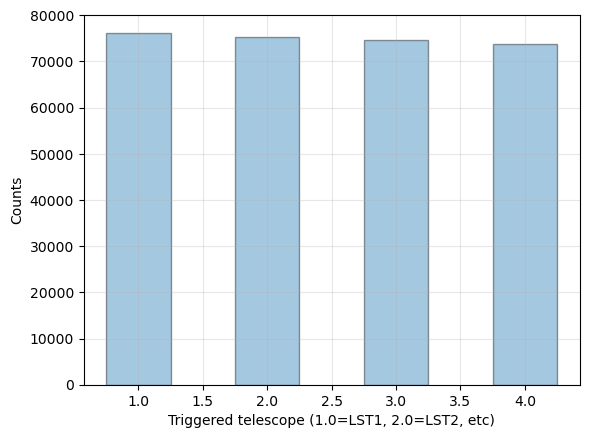

In [272]:
bin_count, bins, _ = plt.hist(mono_mono_mono_one_dim[:300000],bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = False, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope (1.0=LST1, 2.0=LST2, etc)')
plt.ylabel('Counts')
#plt.title("Mono trigger in mono_mono regime")
print(f"Counts in each bin {bin_count}")

####  NO_STEREO_TRIGGER = 1 (only stereo trigger)

Counts in each bin [393. 193. 203. 397.]


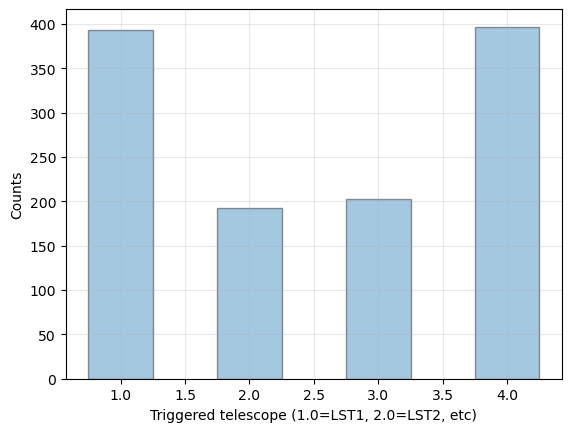

In [278]:
bin_count, bins, _ = plt.hist(mono_mono_stereo_one_dim[:300000],bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = False, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope (1.0=LST1, 2.0=LST2, etc)')
plt.ylabel('Counts')
#plt.title("Stereo trigger in mono_mono regime")
print(f"Counts in each bin {bin_count}")

####  NO_STEREO_TRIGGER = 0 (only mono trigger)

Counts in each bin [76224. 75321. 74671. 73784.]


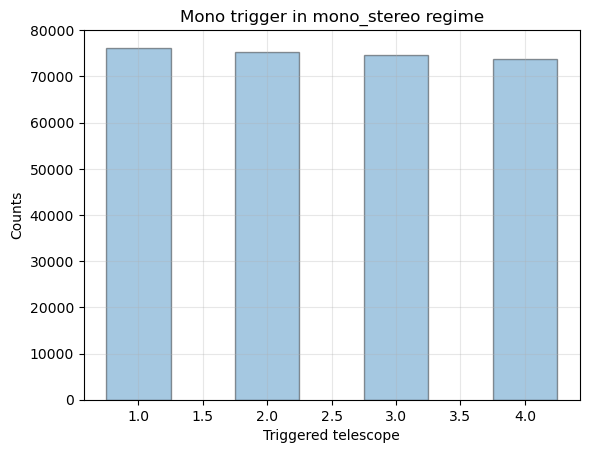

In [168]:
bin_count, bins, _ = plt.hist(mono_mono_one_dim[:300000],bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = False, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope')
plt.ylabel('Counts')
plt.title("Mono trigger in mono_stereo regime")
print(f"Counts in each bin {bin_count}")


####  NO_STEREO_TRIGGER = 0 (only stereo trigger)

Counts in each bin [0.34749363 0.14868309 0.16142736 0.34239592]


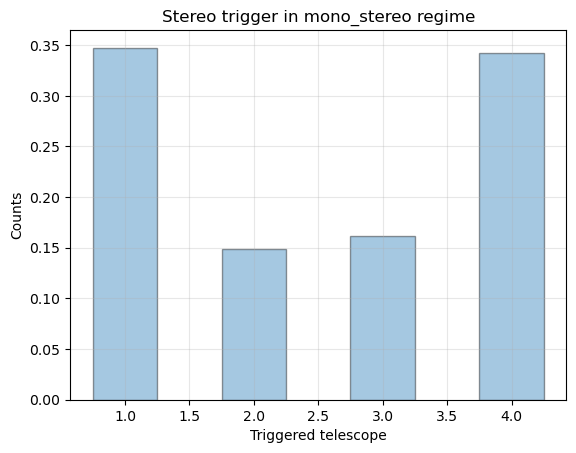

In [279]:
bin_count, bins, _ = plt.hist(mono_stereo_one_dim,bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope')
plt.ylabel('Counts')
plt.title("Stereo trigger in mono_stereo regime")
print(f"Counts in each bin {bin_count}")


####  NO_STEREO_TRIGGER = DELETED (only stereo trigger) 

Counts in each bin [0.48233487 0.01228879 0.01536098 0.49001536]


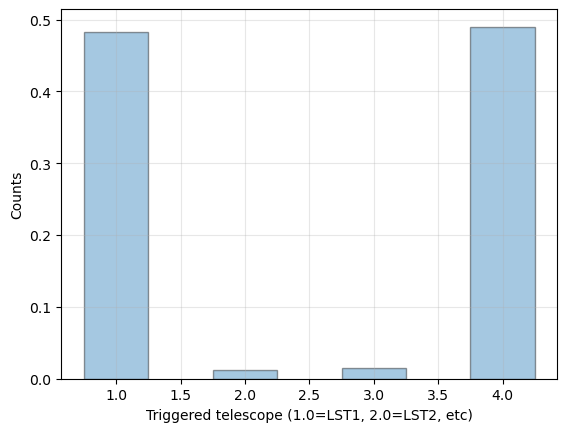

In [275]:
bin_count, bins, _ = plt.hist(stereo_stereo_one_dim, bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope (1.0=LST1, 2.0=LST2, etc)')
plt.ylabel('Counts')
#plt.title("Stereo trigger in stereo_stereo regime")
print(f"Counts in each bin {bin_count}")


####  NO_STEREO_TRIGGER = DELETED (only mono trigger)

In [266]:
# DOESN'T EXISTS

####  NO_STEREO_TRIGGER = DELETED (only stereo trigger) + prod 6 array_trigger file

Counts in each bin [303.  12.  10. 305.]


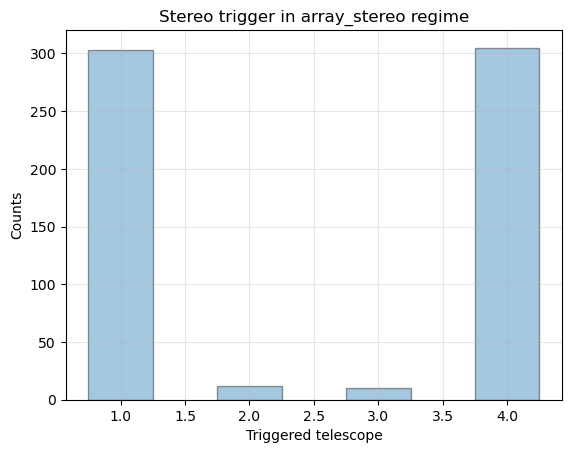

In [103]:
bin_count, bins, _ = plt.hist(array_stereo_one_dim, bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = False, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope')
plt.ylabel('Counts')
plt.title("Stereo trigger in array_stereo regime")
print(f"Counts in each bin {bin_count}")


Counts in each bin [69.  3.  3. 69.]


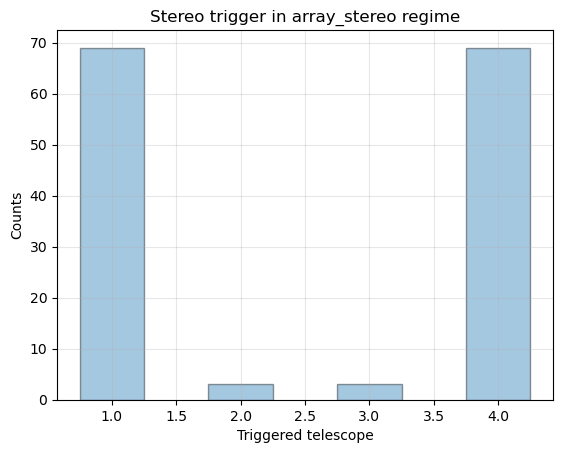

In [258]:
bin_count, bins, _ = plt.hist(georgios_stereo_one_dim, bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = False, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope')
plt.ylabel('Counts')
plt.title("Stereo trigger in array_stereo regime")
print(f"Counts in each bin {bin_count}")


Counts in each bin [21052. 20590. 20534. 20187.]


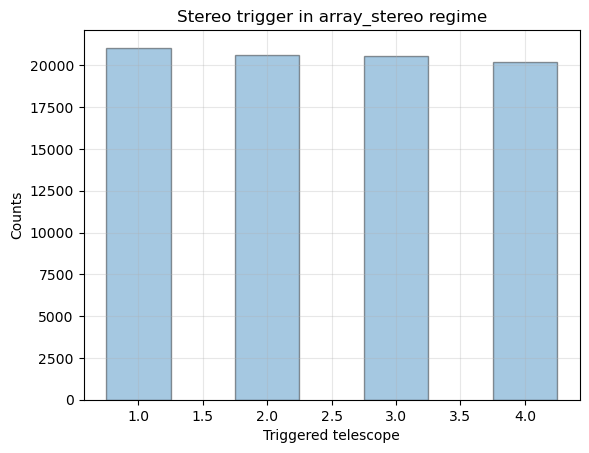

In [259]:
bin_count, bins, _ = plt.hist(georgios_mono_one_dim, bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = False, align = 'left', rwidth=0.5)
plt.grid(alpha = 0.3)
plt.xlabel('Triggered telescope')
plt.ylabel('Counts')
plt.title("Stereo trigger in array_stereo regime")
print(f"Counts in each bin {bin_count}")


#### Number of triggered telescopes

Text(0.5, 1.0, 'Triggered telescope number in different regimes')

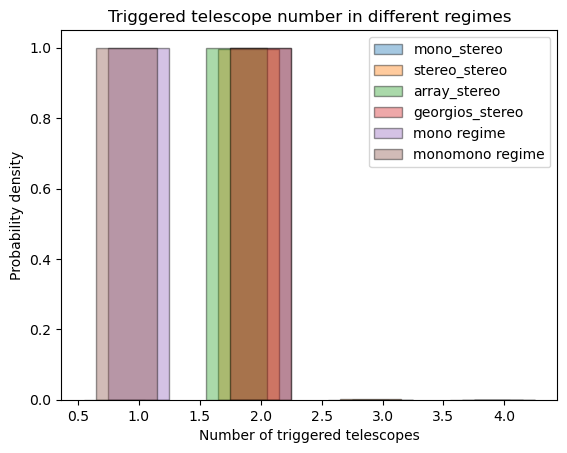

In [263]:
bin_count, bins, _ = plt.hist(mono_stereo_tels_number, bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'mono_stereo')
bin_count, bins, _ = plt.hist(stereo_stereo_tels_number, bins = [0.9,1.9,2.9,3.9,4.9], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'stereo_stereo')
bin_count, bins, _ = plt.hist(array_stereo_tels_number, bins =  [0.8,1.8,2.8,3.8,4.8], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'array_stereo')
bin_count, bins, _ = plt.hist(georgios_stereo_tels_number, bins =  [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'georgios_stereo')
bin_count, bins, _ = plt.hist(mono_mono_tels_number, bins = [1,2,3,4,5], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'mono regime')
bin_count, bins, _ = plt.hist(mono_mono_mono_tels_number, bins = [0.9,1.9,2.9,3.9,4.9], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'monomono regime')
#bin_count, bins, _ = plt.hist(mono_mono_stereo_tels_number, bins = [0.9,1.9,2.9,3.9,4.9], edgecolor = 'black', alpha = 0.4, density = True, align = 'left', rwidth=0.5, label = 'monomono regime')
plt.legend()
plt.xlabel('Number of triggered telescopes')
plt.ylabel('Probability density')
plt.title("Triggered telescope number in different regimes")
#plt.ylim(0,0.1)

3


### Images for shower core

In [198]:
datafile_mono = "/Users/vdk/UnrealLST/simtel_investigations/MONOSTEREO_run1001_muon.simtel.gz"
datafile_stereo = "/Users/vdk/UnrealLST/simtel_investigations/STEREOSTEREO_run1001_muon.simtel.gz"
datafile_array = "/Users/vdk/UnrealLST/simtel_investigations/ARRAYSTEREO_run1001_muon.simtel.gz"
source = SimTelFile(datafile_mono)
source.mc_run_headers[0]


{'shower_prog_id': 1,
 'shower_prog_vers': 7710,
 'shower_prog_start': 1699444800,
 'detector_prog_id': 1,
 'detector_prog_vers': 1593356843,
 'detector_prog_start': 1699453184,
 'obsheight': 2199.0,
 'n_showers': 20000,
 'n_use': 1,
 'core_pos_mode': 1,
 'core_range': array([  0., 150.], dtype=float32),
 'alt_range': array([1.5707964, 1.5707964], dtype=float32),
 'az_range': array([3.1415927, 3.1415927], dtype=float32),
 'diffuse': 1,
 'viewcone': array([0. , 3.5], dtype=float32),
 'E_range': array([0.008418, 1.      ], dtype=float32),
 'spectral_index': -2.0,
 'B_total': 38.592769622802734,
 'B_inclination': 0.6519277095794678,
 'B_declination': -0.08447393774986267,
 'injection_height': -1.0,
 'atmosphere': 99,
 'corsika_iact_options': 187,
 'corsika_low_E_model': 2,
 'corsika_high_E_model': 3,
 'corsika_bunchsize': 5.0,
 'corsika_wlen_min': 230.0,
 'corsika_wlen_max': 900.0,
 'corsika_low_E_detail': 0,
 'corsika_high_E_detail': 303}

#### MONO_STEREO

In [220]:
xcores = []  
ycores = []
xcores_sim = []
ycores_sim = []
Alts = []
Azimuths = []
PE = []


with SimTelFile(datafile_mono) as f:
    evt_iter = f.iter_array_events()
    xcores_temp = []
    ycores_temp = []
    for event in evt_iter:
        xcores_temp.append(event['mc_event']['xcore'])
        ycores_temp.append(event['mc_event']['ycore']) 
        #print(event['mc_event'])
    xcores.extend(xcores_temp)
    ycores.extend(ycores_temp)

with SimTelFile(datafile_mono) as f:
    evt_mc_iter = f.iter_mc_events()
    xcores_sim_temp = []
    ycores_sim_temp = []    
    for event in evt_mc_iter:
        xcores_sim_temp.append(event['mc_event']['xcore'])
        ycores_sim_temp.append(event['mc_event']['ycore'])     
    xcores_sim.extend(xcores_sim_temp)
    ycores_sim.extend(ycores_sim_temp)

print('number of simulated events', len(xcores_sim))
print('number of triggered events', len(xcores))

number of simulated events 20000
number of triggered events 4341


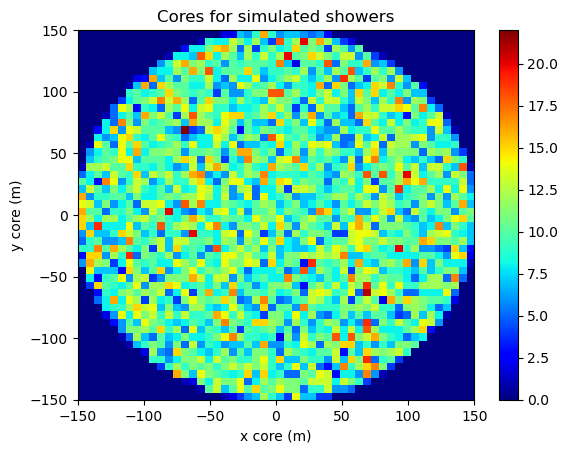

In [221]:
plt.hist2d(xcores_sim, ycores_sim, bins=(50, 50), cmap=plt.cm.jet)
# plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for simulated showers')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('SimCoresElectrons_617.png')
plt.show()

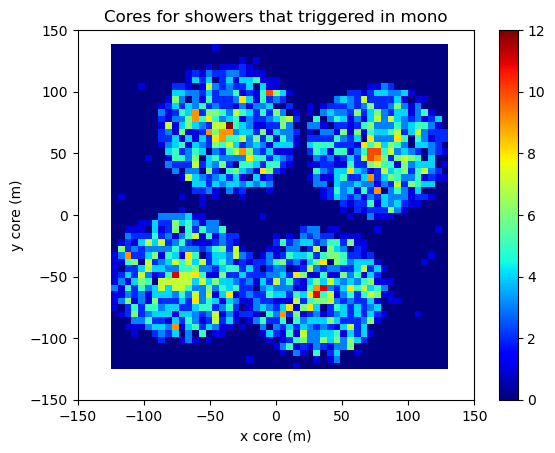

In [222]:
plt.hist2d(xcores, ycores, bins=(50, 50), cmap=plt.cm.jet)
# plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for showers that triggered in mono')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('TrigCoresElectrons_617.png')
plt.show()

#### STEREO_STEREO

In [195]:
xcores = []  
ycores = []
xcores_sim = []
ycores_sim = []
Alts = []
Azimuths = []
PE = []


with SimTelFile(datafile_stereo) as f:
    evt_iter = f.iter_array_events()
    xcores_temp = []
    ycores_temp = []
    for event in evt_iter:
        xcores_temp.append(event['mc_event']['xcore'])
        ycores_temp.append(event['mc_event']['ycore']) 
        #print(event['mc_event'])
    xcores.extend(xcores_temp)
    ycores.extend(ycores_temp)

with SimTelFile(datafile_stereo) as f:
    evt_mc_iter = f.iter_mc_events()
    xcores_sim_temp = []
    ycores_sim_temp = []    
    for event in evt_mc_iter:
        xcores_sim_temp.append(event['mc_event']['xcore'])
        ycores_sim_temp.append(event['mc_event']['ycore'])     
    xcores_sim.extend(xcores_sim_temp)
    ycores_sim.extend(ycores_sim_temp)

print('number of simulated events', len(xcores_sim))
print('number of triggered events', len(xcores))

number of simulated events 20000
number of triggered events 3


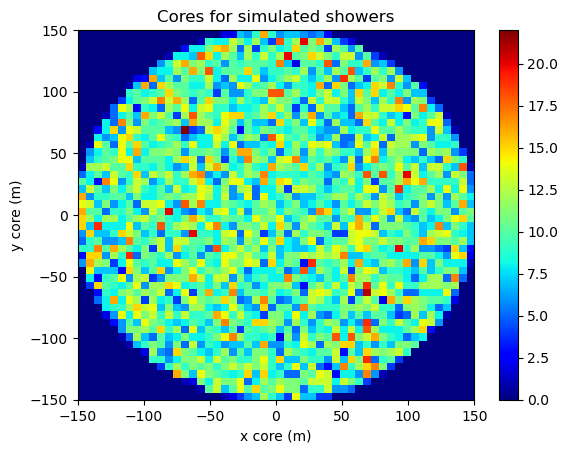

In [196]:
plt.hist2d(xcores_sim, ycores_sim, bins=(50, 50), cmap=plt.cm.jet)
# plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for simulated showers')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('SimCoresElectrons_617.png')
plt.show()

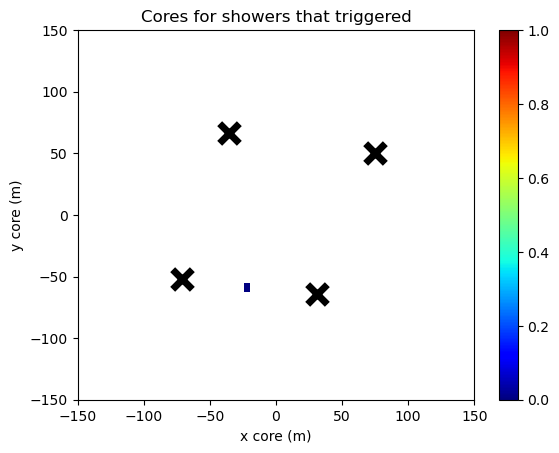

In [197]:
plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.hist2d(xcores, ycores, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for showers that triggered')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('TrigCoresElectrons_617.png')
plt.show()

#### ARRAY_STEREO

In [199]:
xcores = []  
ycores = []
xcores_sim = []
ycores_sim = []
Alts = []
Azimuths = []
PE = []


with SimTelFile(datafile_array) as f:
    evt_iter = f.iter_array_events()
    xcores_temp = []
    ycores_temp = []
    for event in evt_iter:
        xcores_temp.append(event['mc_event']['xcore'])
        ycores_temp.append(event['mc_event']['ycore']) 
        #print(event['mc_event'])
    xcores.extend(xcores_temp)
    ycores.extend(ycores_temp)

with SimTelFile(datafile_array) as f:
    evt_mc_iter = f.iter_mc_events()
    xcores_sim_temp = []
    ycores_sim_temp = []    
    for event in evt_mc_iter:
        xcores_sim_temp.append(event['mc_event']['xcore'])
        ycores_sim_temp.append(event['mc_event']['ycore'])     
    xcores_sim.extend(xcores_sim_temp)
    ycores_sim.extend(ycores_sim_temp)

print('number of simulated events', len(xcores_sim))
print('number of triggered events', len(xcores))

number of simulated events 20000
number of triggered events 3


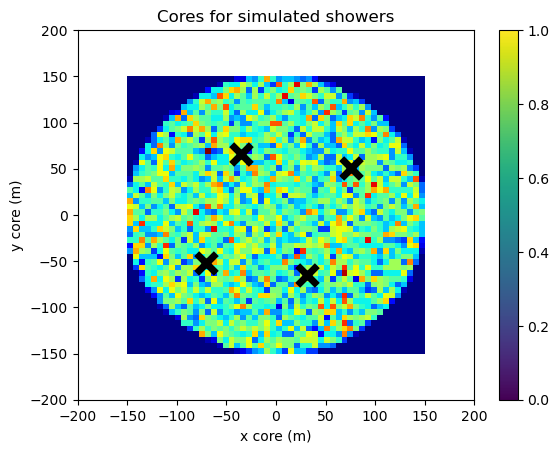

In [255]:
plt.hist2d(xcores_sim, ycores_sim, bins=(50, 50), cmap=plt.cm.jet)
# plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
# plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for simulated showers')
plt.xlim(-200,200)
plt.ylim(-150,150)
#plt.savefig('SimCoresElectrons_617.png')
plt.show()

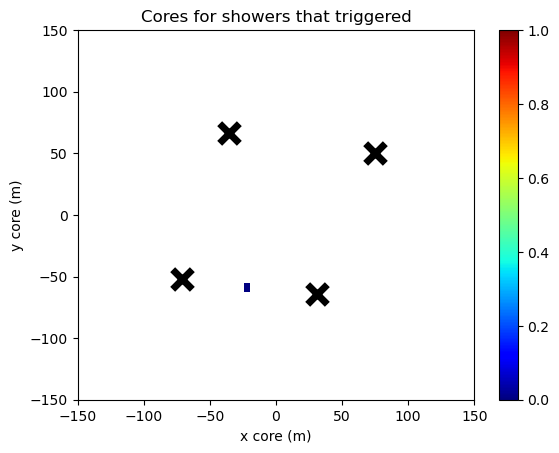

In [201]:
plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.hist2d(xcores, ycores, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for showers that triggered')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('TrigCoresElectrons_617.png')
plt.show()

In [234]:
with SimTelFile(datafile_mono) as f:
    evt_iter = f.iter_array_events()
    xcores_temp = []
    ycores_temp = []
    for event in evt_iter:
        if len(event['telescope_events'].keys()) > 1:
            print(event['telescope_events'].keys())
            xcores_temp.append(event['mc_event']['xcore'])
            ycores_temp.append(event['mc_event']['ycore']) 
        
    xcores.extend(xcores_temp)
    ycores.extend(ycores_temp)

dict_keys([1, 4])
dict_keys([1, 4])
dict_keys([1, 2])


In [235]:
event.keys()

dict_keys(['type', 'event_id', 'mc_shower', 'mc_event', 'telescope_events', 'tracking_positions', 'trigger_information', 'photons', 'emitter', 'photoelectrons', 'photoelectron_sums', 'camera_monitorings', 'laser_calibrations', 'pixel_monitorings'])

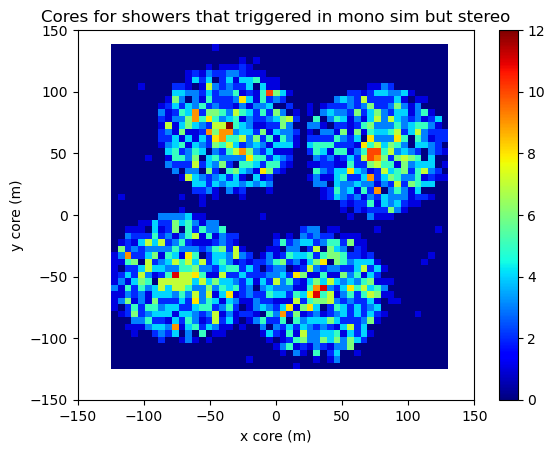

In [225]:
plt.scatter(telescope1[0],telescope1[1], label = 'LST1', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope2[0],telescope2[1], label = 'LST2', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope3[0],telescope3[1], label = 'LST3', marker = 'x', s =200, lw = 5, c = 'k')
plt.scatter(telescope4[0],telescope4[1], label = 'LST4', marker = 'x', s =200, lw = 5, c = 'k')
plt.hist2d(xcores, ycores, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.ylabel('y core (m)')
plt.xlabel('x core (m)')
plt.title('Cores for showers that triggered in mono sim but stereo')
plt.xlim(-150,150)
plt.ylim(-150,150)
#plt.savefig('TrigCoresElectrons_617.png')
plt.show()

In [230]:
test = glob.glob('/Users/vdk/UnrealLST/images/muon_*_tel1.png')

In [233]:
test[:10]

['/Users/vdk/UnrealLST/images/muon_345900_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_264500_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_1605800_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_1363100_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_1773900_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_763800_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_755100_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_258600_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_830800_tel1.png',
 '/Users/vdk/UnrealLST/images/muon_697600_tel1.png']

In [236]:
with eventio.SimTelFile('/Users/vdk/UnrealLST/simtel_investigations/run6901_muon.simtel.gz') as fi:
    for event in fi:
        if len(event['telescope_events']) > 1:
            print(event['telescope_events'].keys())

dict_keys([1, 4])
dict_keys([1, 4])
dict_keys([1, 3])
dict_keys([2, 3])
dict_keys([1, 4])
dict_keys([2, 4])


In [249]:
18/650

0.027692307692307693